In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Data Understanding


In [3]:
train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [4]:
train.sample(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
29902,C-9537,Lida Hamlett,M,53,4208.12,Low,Commercial associate,Drivers,Urban,45147.43,...,728.47,0,Active,746,4208.12,4,Rural,1,76666.76,31603.20
27243,C-17743,Hilde Lucca,M,20,3668.40,NaN,Commercial associate,Core staff,Semi-Urban,309041.80,...,849.43,0,Unpossessed,861,3668.40,4,Rural,1,573873.97,216329.26
26643,C-17384,Donald Pullum,M,53,2538.16,Low,Working,NaN,Urban,45460.87,...,NaN,0,Unpossessed,868,2538.16,1,Rural,1,80838.79,-999.00
732,C-34693,Arielle Isenhour,F,18,3090.52,Low,Working,Medicine staff,Rural,108212.47,...,758.20,1,Unpossessed,239,3090.52,4,Rural,1,159190.10,75748.73
35,C-42461,Torri Jeffreys,F,49,1974.82,Low,Working,Drivers,Semi-Urban,43299.94,...,651.45,0,Inactive,157,1974.82,2,Rural,1,58269.09,0.00


In [5]:
train.shape

(30000, 24)

In [6]:
train.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [7]:
train.isnull().mean()*100

Customer ID                     0.000000
Name                            0.000000
Gender                          0.176667
Age                             0.000000
Income (USD)                   15.253333
Income Stability                5.610000
Profession                      0.000000
Type of Employment             24.233333
Location                        0.000000
Loan Amount Request (USD)       0.000000
Current Loan Expenses (USD)     0.573333
Expense Type 1                  0.000000
Expense Type 2                  0.000000
Dependents                      8.310000
Credit Score                    5.676667
No. of Defaults                 0.000000
Has Active Credit Card          5.220000
Property ID                     0.000000
Property Age                   16.166667
Property Type                   0.000000
Property Location               1.186667
Co-Applicant                    0.000000
Property Price                  0.000000
Loan Sanction Amount (USD)      1.133333
dtype: float64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [9]:
train.duplicated().sum()

0

# Data Cleaning

In [10]:
train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [11]:
train = train.drop(columns=["Name", "Customer ID", "Expense Type 1", "Expense Type 2", "Property ID", "Property Age", "Property Type", "Dependents"])
train.sample(5)

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
20168,M,52,2172.64,Low,Working,Sales staff,Semi-Urban,31969.30,250.09,717.04,1,Inactive,Urban,1,49489.19,22378.51
1904,M,18,1239.42,Low,Working,Core staff,Rural,22236.58,124.69,772.47,0,Inactive,Urban,1,27430.96,16677.44
24589,M,33,3625.61,Low,Working,Sales staff,Semi-Urban,133791.57,519.52,681.58,0,Active,Rural,1,245207.26,93654.10
4936,M,47,1683.39,Low,Working,Laborers,Semi-Urban,49534.44,280.87,NaN,1,Inactive,NaN,1,75187.77,34674.11
9511,M,62,1582.77,Low,Working,Accountants,Semi-Urban,80638.52,281.79,770.24,0,Inactive,Rural,1,125710.09,-999.00


In [12]:
train.shape

(30000, 16)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       29947 non-null  object 
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 25424 non-null  float64
 3   Income Stability             28317 non-null  object 
 4   Profession                   30000 non-null  object 
 5   Type of Employment           22730 non-null  object 
 6   Location                     30000 non-null  object 
 7   Loan Amount Request (USD)    30000 non-null  float64
 8   Current Loan Expenses (USD)  29828 non-null  float64
 9   Credit Score                 28297 non-null  float64
 10  No. of Defaults              30000 non-null  int64  
 11  Has Active Credit Card       28434 non-null  object 
 12  Property Location            29644 non-null  object 
 13  Co-Applicant    

In [14]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "float64":
        train[train.columns[i]] = train[train.columns[i]]*77

In [15]:
train["Credit Score"] = train["Credit Score"] / 77

In [16]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,148844.85,Low,Working,Sales staff,Semi-Urban,5606337.66,18563.16,809.44,0,NaN,Rural,1,9234876.42,4204752.86
1,M,32,381374.07,Low,Working,NaN,Semi-Urban,3606485.19,38177.37,780.40,0,Unpossessed,Rural,1,4218907.00,2885188.46
2,F,65,76090.63,High,Pensioner,NaN,Semi-Urban,3510664.08,13240.15,833.15,0,Unpossessed,Urban,0,5577924.66,2808531.11
3,F,65,NaN,High,Pensioner,NaN,Rural,6164459.84,22987.58,832.70,1,Unpossessed,Semi-Urban,1,9350996.27,4315121.58
4,F,31,201337.29,Low,Working,High skill tech staff,Semi-Urban,8767134.53,37838.57,745.55,1,Active,Semi-Urban,1,16059729.07,5698637.56


In [17]:
train.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,3.000000e+04,29828.000000,28297.000000,30000.000000,30000.000000,3.000000e+04,2.966000e+04
mean,40.092300,2.025542e+05,6.839628e+06,30872.139485,739.885381,0.193933,-4.743867,1.014550e+07,3.668999e+06
std,16.045129,8.672297e+05,4.584345e+06,18675.993868,72.163846,0.395384,74.614593,7.203315e+06,3.713028e+06
min,18.000000,2.908290e+04,4.657145e+05,-76923.000000,580.000000,0.000000,-999.000000,-7.692300e+04,-7.692300e+04
25%,25.000000,1.270852e+05,3.170687e+06,19070.397500,681.880000,0.000000,1.000000,4.664056e+06,0.000000e+00
50%,40.000000,1.711275e+05,5.784862e+06,28890.785000,739.820000,0.000000,1.000000,8.469508e+06,2.711123e+06
75%,55.000000,2.379756e+05,9.237275e+06,40139.522500,799.120000,0.000000,1.000000,1.377382e+07,5.718116e+06
max,65.000000,1.368644e+08,4.785533e+07,295747.760000,896.260000,1.000000,1.000000,8.300344e+07,3.710686e+07


In [18]:
train.isnull().mean()*100

Gender                          0.176667
Age                             0.000000
Income (USD)                   15.253333
Income Stability                5.610000
Profession                      0.000000
Type of Employment             24.233333
Location                        0.000000
Loan Amount Request (USD)       0.000000
Current Loan Expenses (USD)     0.573333
Credit Score                    5.676667
No. of Defaults                 0.000000
Has Active Credit Card          5.220000
Property Location               1.186667
Co-Applicant                    0.000000
Property Price                  0.000000
Loan Sanction Amount (USD)      1.133333
dtype: float64

In [19]:
train["Gender"].unique()

array(['F', 'M', nan], dtype=object)

In [20]:
train["Gender"] = train["Gender"].fillna(train["Gender"].mode()[0])

In [21]:
# Multivariate Analysis KNN Imputing
knn = KNNImputer()
train["Income (USD)"] = knn.fit_transform(train[["Income (USD)"]])

In [22]:
train["Income Stability"].value_counts()

Low     25751
High     2566
Name: Income Stability, dtype: int64

In [23]:
train["Income Stability"] = train["Income Stability"].fillna(train["Income Stability"].mode()[0])

In [24]:
train["Type of Employment"].value_counts()

Laborers                 5578
Sales staff              3736
Core staff               3230
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    1307
Medicine staff            864
Security staff            579
Cooking staff             566
Private service staff     342
Cleaning staff            341
Low-skill Laborers        162
Secretaries               161
Waiters/barmen staff      149
Realty agents              86
IT staff                   77
HR staff                   72
Name: Type of Employment, dtype: int64

In [25]:
train["Type of Employment"] = train["Type of Employment"].fillna(train["Type of Employment"].mode()[0])

In [26]:
train["Current Loan Expenses (USD)"].mean()

30872.13948471235

In [27]:
train["Current Loan Expenses (USD)"] = train["Current Loan Expenses (USD)"].fillna(train["Current Loan Expenses (USD)"].mean())

In [28]:
train["Credit Score"].mean()

739.8853811358094

In [29]:
train["Credit Score"] = train["Credit Score"].fillna(train["Credit Score"].mean())

In [30]:
train["Has Active Credit Card"].unique()

array([nan, 'Unpossessed', 'Active', 'Inactive'], dtype=object)

In [31]:
train["Has Active Credit Card"] = train["Has Active Credit Card"].fillna(train["Has Active Credit Card"].mode()[0])

In [32]:
train["Property Location"].mode()[0]

'Semi-Urban'

In [33]:
train["Property Location"] = train["Property Location"].fillna(train["Property Location"].mode()[0])

In [34]:
train.isnull().mean()*100

Gender                         0.000000
Age                            0.000000
Income (USD)                   0.000000
Income Stability               0.000000
Profession                     0.000000
Type of Employment             0.000000
Location                       0.000000
Loan Amount Request (USD)      0.000000
Current Loan Expenses (USD)    0.000000
Credit Score                   0.000000
No. of Defaults                0.000000
Has Active Credit Card         0.000000
Property Location              0.000000
Co-Applicant                   0.000000
Property Price                 0.000000
Loan Sanction Amount (USD)     1.133333
dtype: float64

In [35]:
train.dropna(inplace=True)

In [36]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "float64":
        train[train.columns[i]] = train[train.columns[i]].astype(int)

In [37]:
train.sample(20)

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
18840,F,60,268286,Low,State servant,Accountants,Semi-Urban,20228039,58907,735,1,Active,Rural,1,22365932,13148225
17658,M,42,276948,Low,Working,Accountants,Semi-Urban,5840089,46470,817,0,Active,Semi-Urban,1,8923558,4088062
1217,F,20,402764,Low,Working,Drivers,Semi-Urban,17227091,65355,637,0,Active,Rural,0,28458860,0
7318,F,27,202554,Low,Working,Core staff,Semi-Urban,7911043,36538,766,0,Unpossessed,Urban,1,9852228,5537730
24398,F,40,493385,Low,Commercial associate,Managers,Semi-Urban,7623438,39152,787,0,Active,Semi-Urban,1,10800100,0
9917,M,37,162599,Low,Working,Sales staff,Rural,2308753,20137,618,1,Unpossessed,Rural,1,2618590,0
17768,M,24,168029,Low,Commercial associate,Laborers,Semi-Urban,6439536,25162,660,0,Active,Urban,1,10068505,4507675
15878,F,43,202554,Low,Working,Sales staff,Semi-Urban,4790250,25584,739,0,Active,Rural,1,8154902,3113662
17495,F,65,202554,High,Pensioner,Laborers,Semi-Urban,10220064,30743,773,0,Inactive,Urban,1,12705879,7154045
11284,M,59,269359,Low,Working,Laborers,Semi-Urban,7332993,29470,659,1,Unpossessed,Urban,1,9661779,5133095


In [38]:
train[train["Co-Applicant"] == -999]

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
62,M,51,153498,Low,Working,Private service staff,Rural,7491980,21231,801,0,Active,Urban,-999,12099552,5244386
98,M,18,117964,Low,Working,Laborers,Semi-Urban,2604133,13108,682,0,Unpossessed,Rural,-999,3775579,1692687
150,M,36,164982,Low,Working,Core staff,Semi-Urban,3681751,20130,847,1,Inactive,Rural,-999,6428083,2761313
812,F,29,401421,Low,Commercial associate,Managers,Semi-Urban,7015571,38570,707,0,Inactive,Rural,-999,10134207,4910899
1077,F,50,202554,Low,Working,Managers,Semi-Urban,7784733,56114,789,0,Unpossessed,Semi-Urban,-999,14105052,5449313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29312,F,20,345723,Low,Commercial associate,High skill tech staff,Urban,27041670,70664,715,1,Active,Semi-Urban,-999,31516154,18929168
29531,M,61,285332,Low,Commercial associate,Laborers,Semi-Urban,3386432,17586,697,0,Inactive,Semi-Urban,-999,3870744,2370502
29611,F,41,318068,Low,Commercial associate,Laborers,Semi-Urban,16953445,50217,789,0,Active,Rural,-999,23640512,12715083
29821,F,61,270215,Low,Working,Sales staff,Semi-Urban,5460045,27341,718,1,Active,Urban,-999,-76923,3549029


In [39]:
train[train["Co-Applicant"] == -999].index

Int64Index([   62,    98,   150,   812,  1077,  1180,  2054,  2113,  2152,
             2221,
            ...
            28057, 28595, 28987, 29092, 29280, 29312, 29531, 29611, 29821,
            29965],
           dtype='int64', length=165)

In [40]:
train.drop(train[train["Co-Applicant"] == -999].index, inplace = True)

In [41]:
train.drop(train[train["Profession"] == "Maternity leave"].index, inplace = True)

In [42]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,148844,Low,Working,Sales staff,Semi-Urban,5606337,18563,809,0,Active,Rural,1,9234876,4204752
1,M,32,381374,Low,Working,Laborers,Semi-Urban,3606485,38177,780,0,Unpossessed,Rural,1,4218907,2885188
2,F,65,76090,High,Pensioner,Laborers,Semi-Urban,3510664,13240,833,0,Unpossessed,Urban,0,5577924,2808531
3,F,65,202554,High,Pensioner,Laborers,Rural,6164459,22987,832,1,Unpossessed,Semi-Urban,1,9350996,4315121
4,F,31,201337,Low,Working,High skill tech staff,Semi-Urban,8767134,37838,745,1,Active,Semi-Urban,1,16059729,5698637


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29494 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       29494 non-null  object
 1   Age                          29494 non-null  int64 
 2   Income (USD)                 29494 non-null  int32 
 3   Income Stability             29494 non-null  object
 4   Profession                   29494 non-null  object
 5   Type of Employment           29494 non-null  object
 6   Location                     29494 non-null  object
 7   Loan Amount Request (USD)    29494 non-null  int32 
 8   Current Loan Expenses (USD)  29494 non-null  int32 
 9   Credit Score                 29494 non-null  int32 
 10  No. of Defaults              29494 non-null  int64 
 11  Has Active Credit Card       29494 non-null  object
 12  Property Location            29494 non-null  object
 13  Co-Applicant                 29

In [44]:
# train.drop(columns=["Gender", "Loan Sanction Amount (USD)"], inplace=True)

In [45]:
train.shape

(29494, 16)

# Exploratory Data Analysis

In [46]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,148844,Low,Working,Sales staff,Semi-Urban,5606337,18563,809,0,Active,Rural,1,9234876,4204752
1,M,32,381374,Low,Working,Laborers,Semi-Urban,3606485,38177,780,0,Unpossessed,Rural,1,4218907,2885188
2,F,65,76090,High,Pensioner,Laborers,Semi-Urban,3510664,13240,833,0,Unpossessed,Urban,0,5577924,2808531
3,F,65,202554,High,Pensioner,Laborers,Rural,6164459,22987,832,1,Unpossessed,Semi-Urban,1,9350996,4315121
4,F,31,201337,Low,Working,High skill tech staff,Semi-Urban,8767134,37838,745,1,Active,Semi-Urban,1,16059729,5698637


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29494 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       29494 non-null  object
 1   Age                          29494 non-null  int64 
 2   Income (USD)                 29494 non-null  int32 
 3   Income Stability             29494 non-null  object
 4   Profession                   29494 non-null  object
 5   Type of Employment           29494 non-null  object
 6   Location                     29494 non-null  object
 7   Loan Amount Request (USD)    29494 non-null  int32 
 8   Current Loan Expenses (USD)  29494 non-null  int32 
 9   Credit Score                 29494 non-null  int32 
 10  No. of Defaults              29494 non-null  int64 
 11  Has Active Credit Card       29494 non-null  object
 12  Property Location            29494 non-null  object
 13  Co-Applicant                 29

In [48]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,148844,Low,Working,Sales staff,Semi-Urban,5606337,18563,809,0,Active,Rural,1,9234876,4204752
1,M,32,381374,Low,Working,Laborers,Semi-Urban,3606485,38177,780,0,Unpossessed,Rural,1,4218907,2885188
2,F,65,76090,High,Pensioner,Laborers,Semi-Urban,3510664,13240,833,0,Unpossessed,Urban,0,5577924,2808531
3,F,65,202554,High,Pensioner,Laborers,Rural,6164459,22987,832,1,Unpossessed,Semi-Urban,1,9350996,4315121
4,F,31,201337,Low,Working,High skill tech staff,Semi-Urban,8767134,37838,745,1,Active,Semi-Urban,1,16059729,5698637


Univariant Analysis

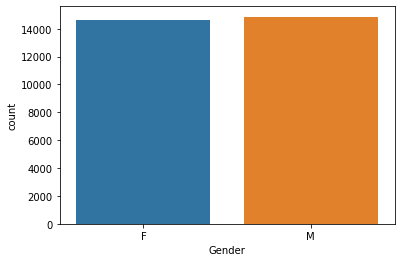

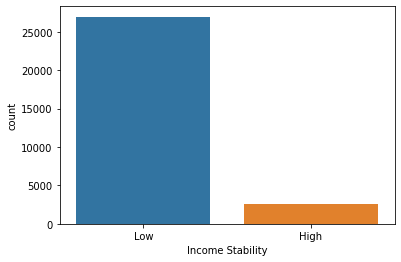

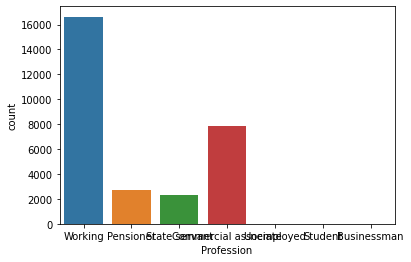

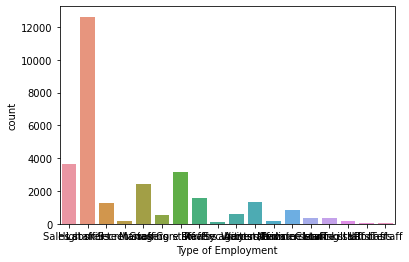

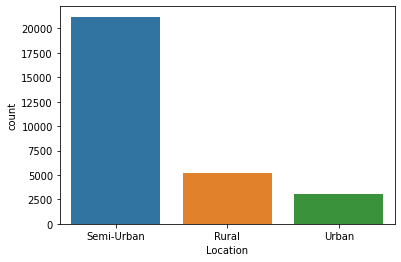

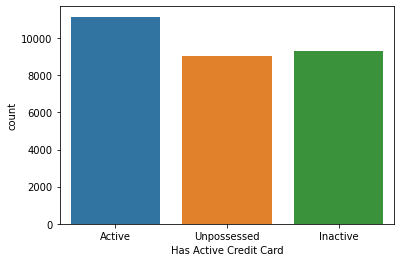

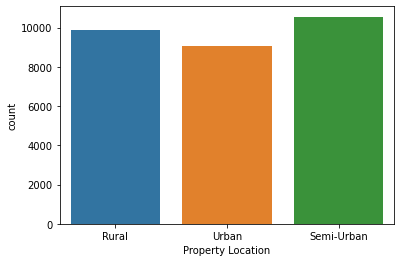

In [49]:
# Bar Plot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "object":
        plt.show(sns.countplot(train[train.columns[i]]))

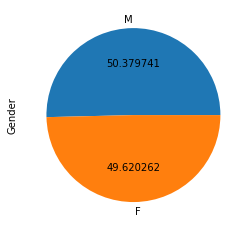

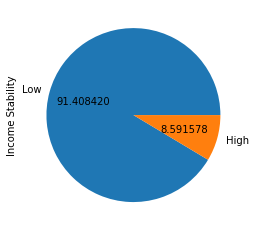

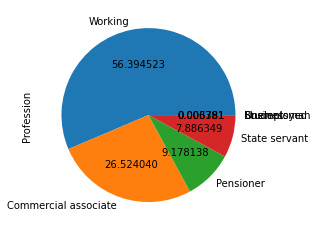

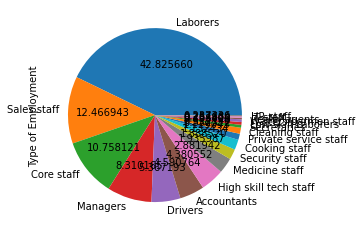

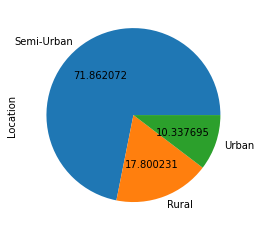

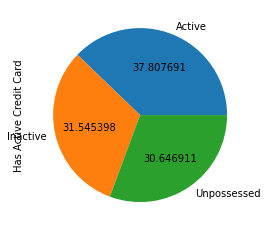

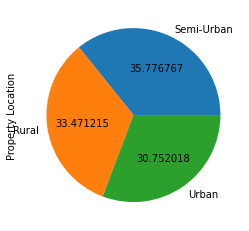

In [50]:
# Pie Chart
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "object":
        plt.show(train[train.columns[i]].value_counts().plot(kind="pie", autopct="%2f"))

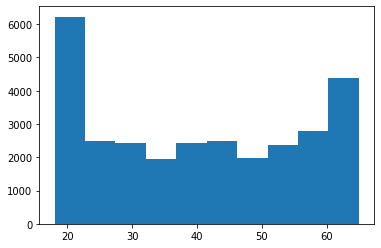

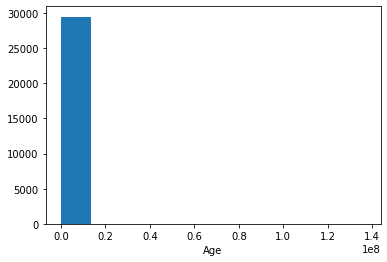

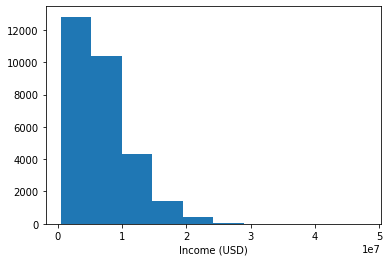

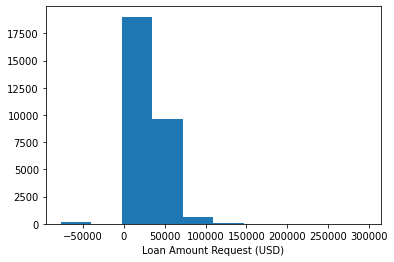

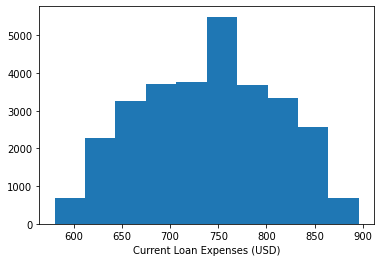

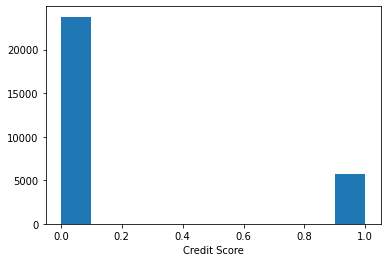

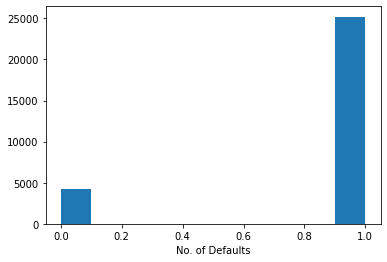

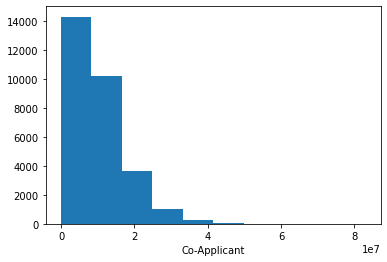

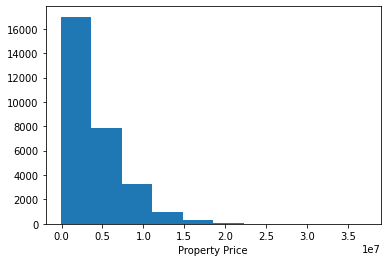

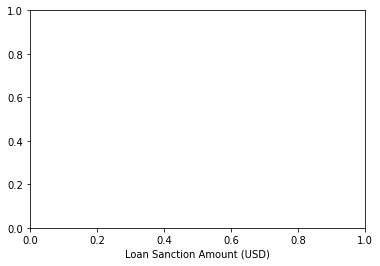

In [51]:
# Histogram
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "int32" or train[train.columns[i]].dtypes == "float64":
        plt.show(plt.hist(train[train.columns[i]]))
        plt.xlabel(train.columns[i])

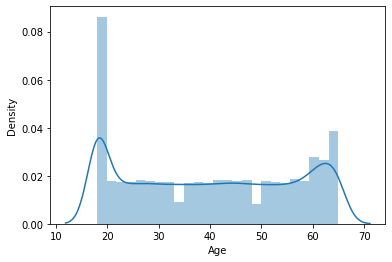

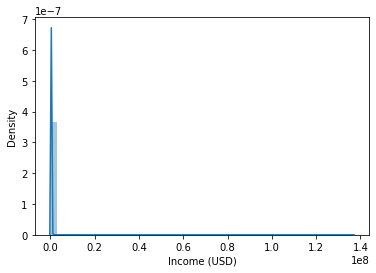

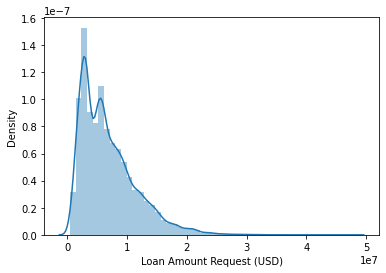

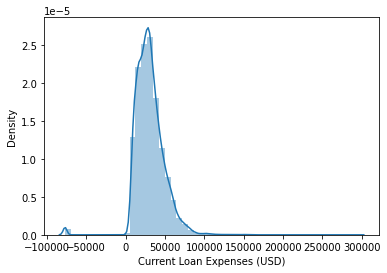

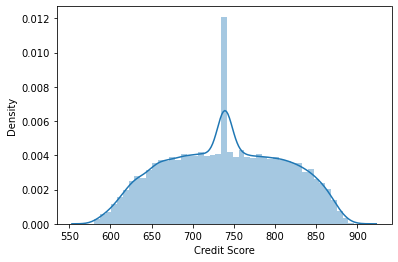

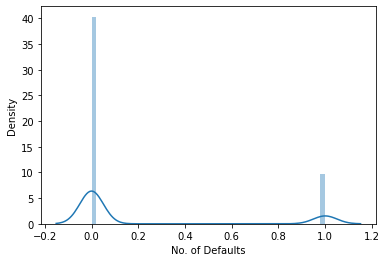

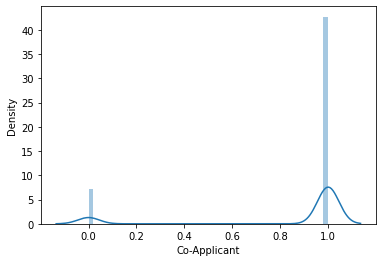

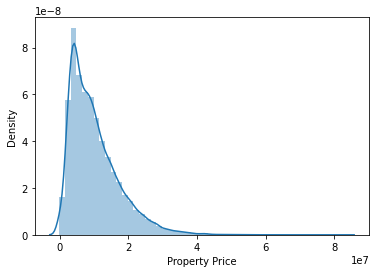

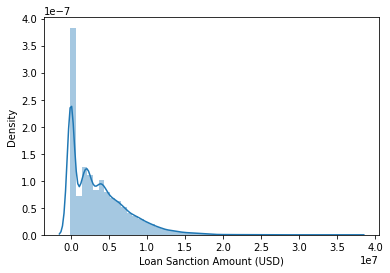

In [52]:
# Distplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "int32" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

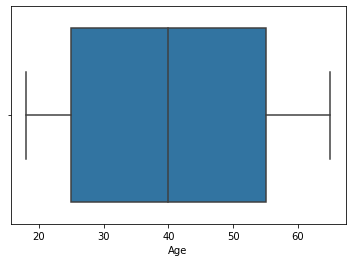

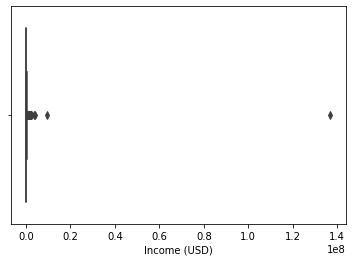

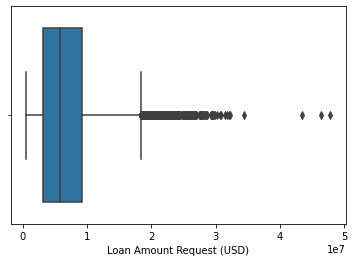

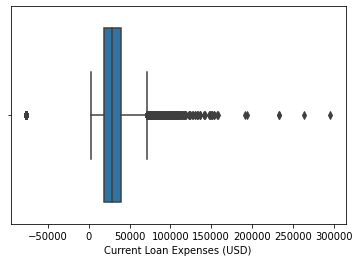

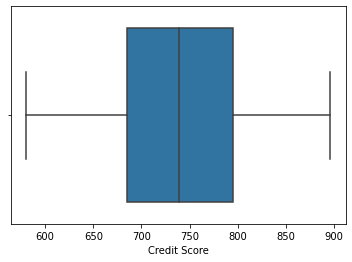

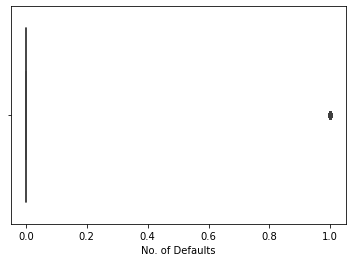

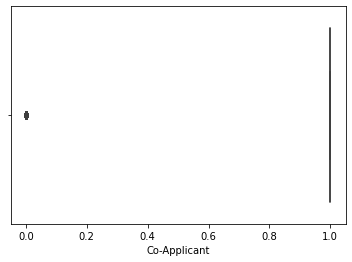

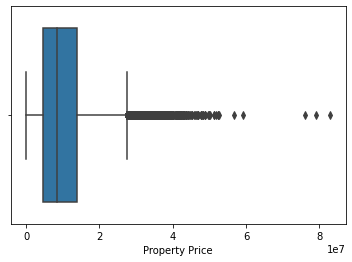

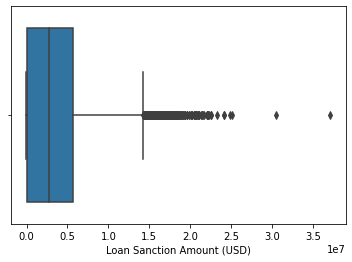

In [53]:
# Boxplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "int32" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

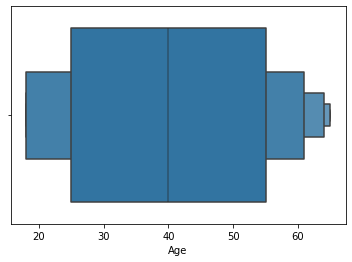

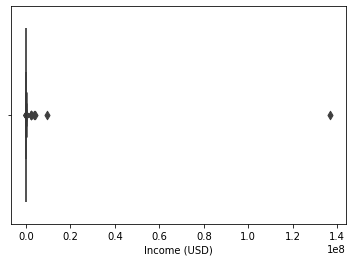

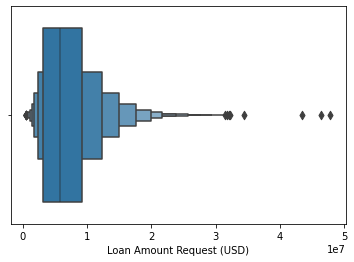

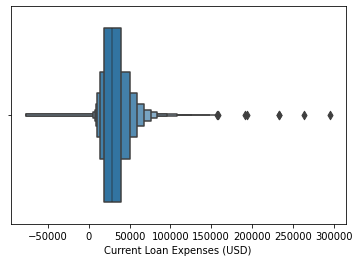

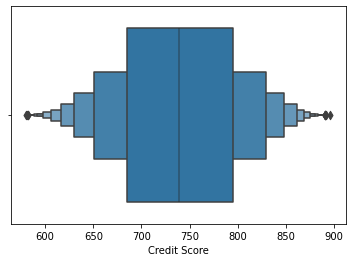

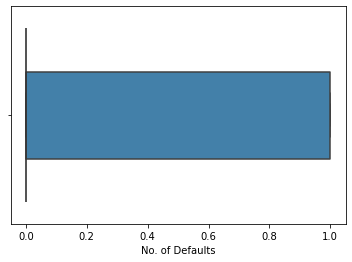

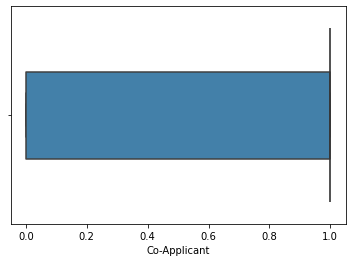

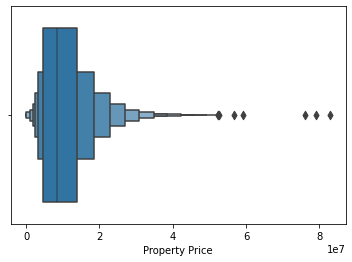

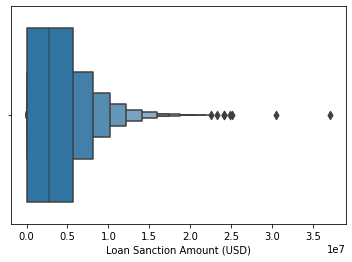

In [54]:
# Boxenplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "int32" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.boxenplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

Bivariant Analysis

In [55]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,148844,Low,Working,Sales staff,Semi-Urban,5606337,18563,809,0,Active,Rural,1,9234876,4204752
1,M,32,381374,Low,Working,Laborers,Semi-Urban,3606485,38177,780,0,Unpossessed,Rural,1,4218907,2885188
2,F,65,76090,High,Pensioner,Laborers,Semi-Urban,3510664,13240,833,0,Unpossessed,Urban,0,5577924,2808531
3,F,65,202554,High,Pensioner,Laborers,Rural,6164459,22987,832,1,Unpossessed,Semi-Urban,1,9350996,4315121
4,F,31,201337,Low,Working,High skill tech staff,Semi-Urban,8767134,37838,745,1,Active,Semi-Urban,1,16059729,5698637


Numeriacl - Numerical

Line Plot

<AxesSubplot:xlabel='Age', ylabel='Income (USD)'>

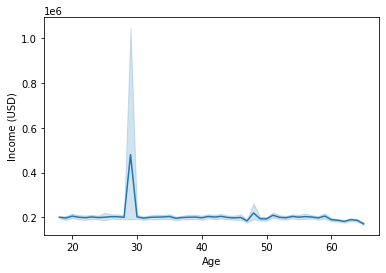

In [56]:
sns.lineplot(train["Age"], train["Income (USD)"])

<AxesSubplot:xlabel='Income (USD)', ylabel='Loan Sanction Amount (USD)'>

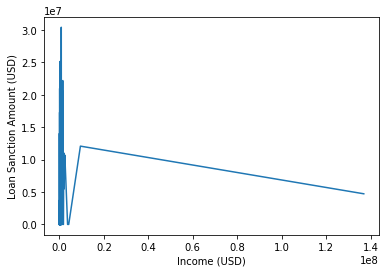

In [57]:
sns.lineplot(train["Income (USD)"], train["Loan Sanction Amount (USD)"])

<AxesSubplot:xlabel='Credit Score', ylabel='Loan Sanction Amount (USD)'>

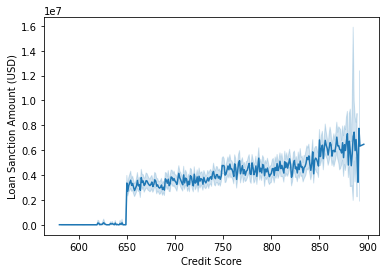

In [58]:
sns.lineplot(train["Credit Score"], train["Loan Sanction Amount (USD)"])

Scatter PLot

<AxesSubplot:xlabel='Age', ylabel='Income (USD)'>

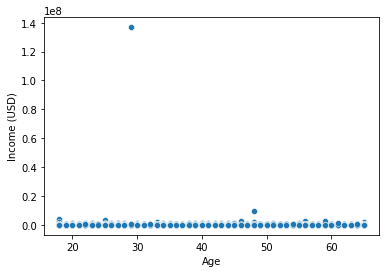

In [59]:
sns.scatterplot(train["Age"], train["Income (USD)"])

<AxesSubplot:xlabel='Income (USD)', ylabel='Loan Sanction Amount (USD)'>

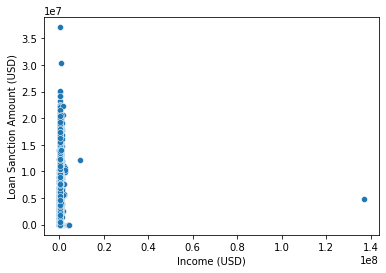

In [60]:
sns.scatterplot(train["Income (USD)"], train["Loan Sanction Amount (USD)"])

<AxesSubplot:xlabel='Credit Score', ylabel='Loan Sanction Amount (USD)'>

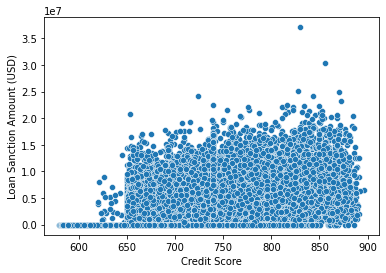

In [61]:
sns.scatterplot(train["Credit Score"], train["Loan Sanction Amount (USD)"])

Numericaal - Categorical

In [62]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,148844,Low,Working,Sales staff,Semi-Urban,5606337,18563,809,0,Active,Rural,1,9234876,4204752
1,M,32,381374,Low,Working,Laborers,Semi-Urban,3606485,38177,780,0,Unpossessed,Rural,1,4218907,2885188
2,F,65,76090,High,Pensioner,Laborers,Semi-Urban,3510664,13240,833,0,Unpossessed,Urban,0,5577924,2808531
3,F,65,202554,High,Pensioner,Laborers,Rural,6164459,22987,832,1,Unpossessed,Semi-Urban,1,9350996,4315121
4,F,31,201337,Low,Working,High skill tech staff,Semi-Urban,8767134,37838,745,1,Active,Semi-Urban,1,16059729,5698637


<AxesSubplot:xlabel='Gender', ylabel='Age'>

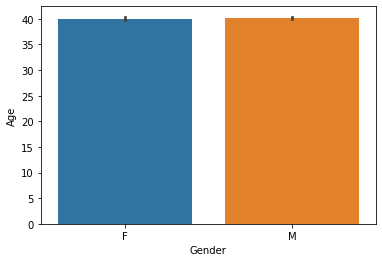

In [63]:
sns.barplot(train["Gender"], train["Age"])

<AxesSubplot:xlabel='Profession', ylabel='Loan Sanction Amount (USD)'>

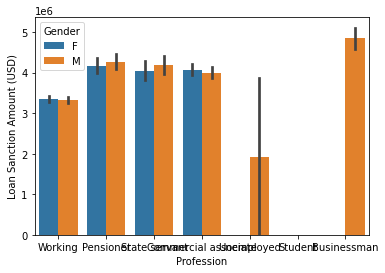

In [64]:
sns.barplot(train["Profession"], train["Loan Sanction Amount (USD)"], hue=train["Gender"])

<AxesSubplot:xlabel='Property Location', ylabel='Property Price'>

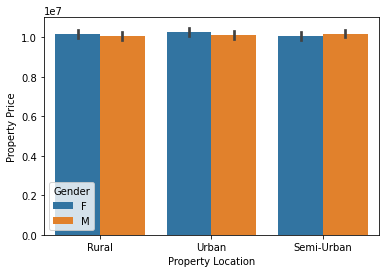

In [65]:
sns.barplot(train["Property Location"], train["Property Price"], hue=train["Gender"])

Categorical - Categorical

In [66]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,148844,Low,Working,Sales staff,Semi-Urban,5606337,18563,809,0,Active,Rural,1,9234876,4204752
1,M,32,381374,Low,Working,Laborers,Semi-Urban,3606485,38177,780,0,Unpossessed,Rural,1,4218907,2885188
2,F,65,76090,High,Pensioner,Laborers,Semi-Urban,3510664,13240,833,0,Unpossessed,Urban,0,5577924,2808531
3,F,65,202554,High,Pensioner,Laborers,Rural,6164459,22987,832,1,Unpossessed,Semi-Urban,1,9350996,4315121
4,F,31,201337,Low,Working,High skill tech staff,Semi-Urban,8767134,37838,745,1,Active,Semi-Urban,1,16059729,5698637


<AxesSubplot:xlabel='Income Stability', ylabel='Gender'>

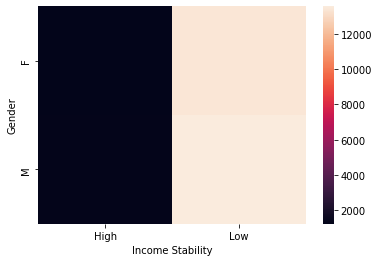

In [67]:
sns.heatmap(pd.crosstab(train["Gender"], train["Income Stability"]))

<AxesSubplot:xlabel='Gender', ylabel='Profession'>

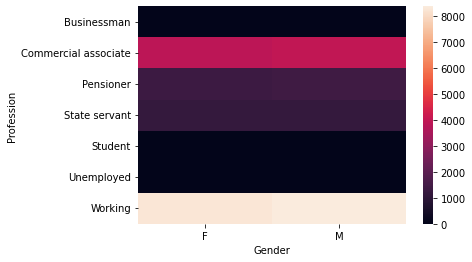

In [68]:
sns.heatmap(pd.crosstab(train["Profession"], train["Gender"]))

<AxesSubplot:xlabel='Gender', ylabel='Type of Employment'>

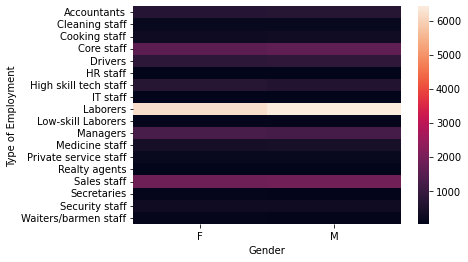

In [69]:
sns.heatmap(pd.crosstab(train["Type of Employment"], train["Gender"]))

Multivariant Analysis

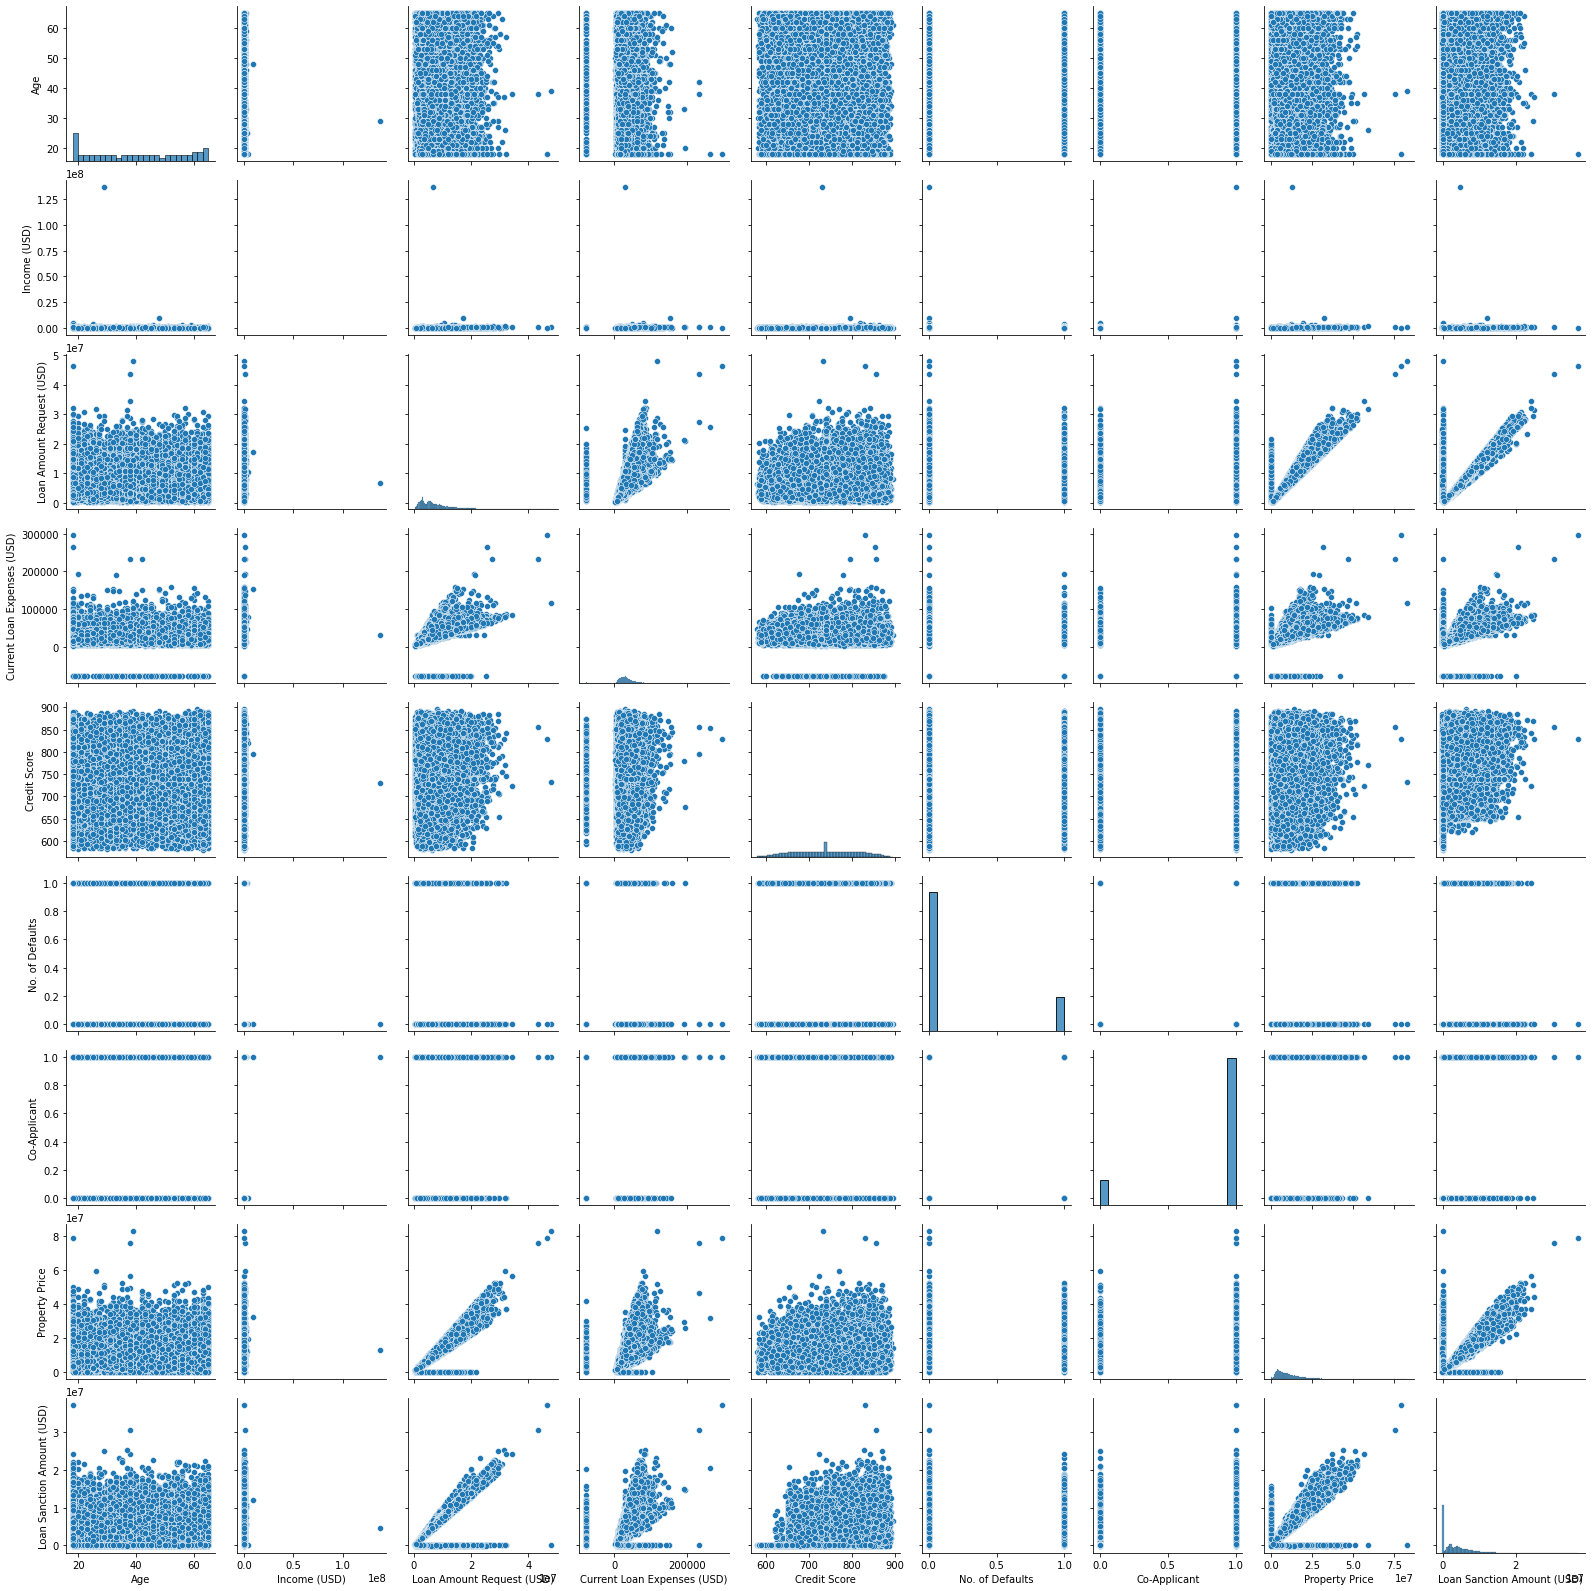

In [70]:
sns.pairplot(train)

<AxesSubplot:>

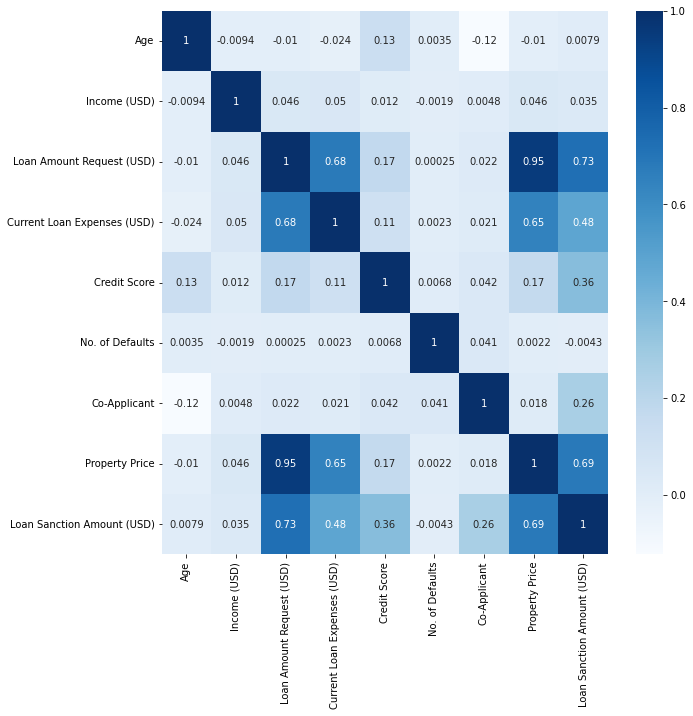

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cbar=True, annot=True, cmap='Blues')

In [72]:
train.shape

(29494, 16)

In [73]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,148844,Low,Working,Sales staff,Semi-Urban,5606337,18563,809,0,Active,Rural,1,9234876,4204752
1,M,32,381374,Low,Working,Laborers,Semi-Urban,3606485,38177,780,0,Unpossessed,Rural,1,4218907,2885188
2,F,65,76090,High,Pensioner,Laborers,Semi-Urban,3510664,13240,833,0,Unpossessed,Urban,0,5577924,2808531
3,F,65,202554,High,Pensioner,Laborers,Rural,6164459,22987,832,1,Unpossessed,Semi-Urban,1,9350996,4315121
4,F,31,201337,Low,Working,High skill tech staff,Semi-Urban,8767134,37838,745,1,Active,Semi-Urban,1,16059729,5698637


# Feature Engineering

1. Outlier Detection

In [142]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,148844,Low,Working,Sales staff,Semi-Urban,5606337,18563,809,0,Active,Rural,1,9234876,4204752
1,M,32,381374,Low,Working,Laborers,Semi-Urban,3606485,38177,780,0,Unpossessed,Rural,1,4218907,2885188
2,F,65,76090,High,Pensioner,Laborers,Semi-Urban,3510664,13240,833,0,Unpossessed,Urban,0,5577924,2808531
3,F,65,202554,High,Pensioner,Laborers,Rural,6164459,22987,832,1,Unpossessed,Semi-Urban,1,9350996,4315121
4,F,31,201337,Low,Working,High skill tech staff,Semi-Urban,8767134,37838,745,1,Active,Semi-Urban,1,16059729,5698637


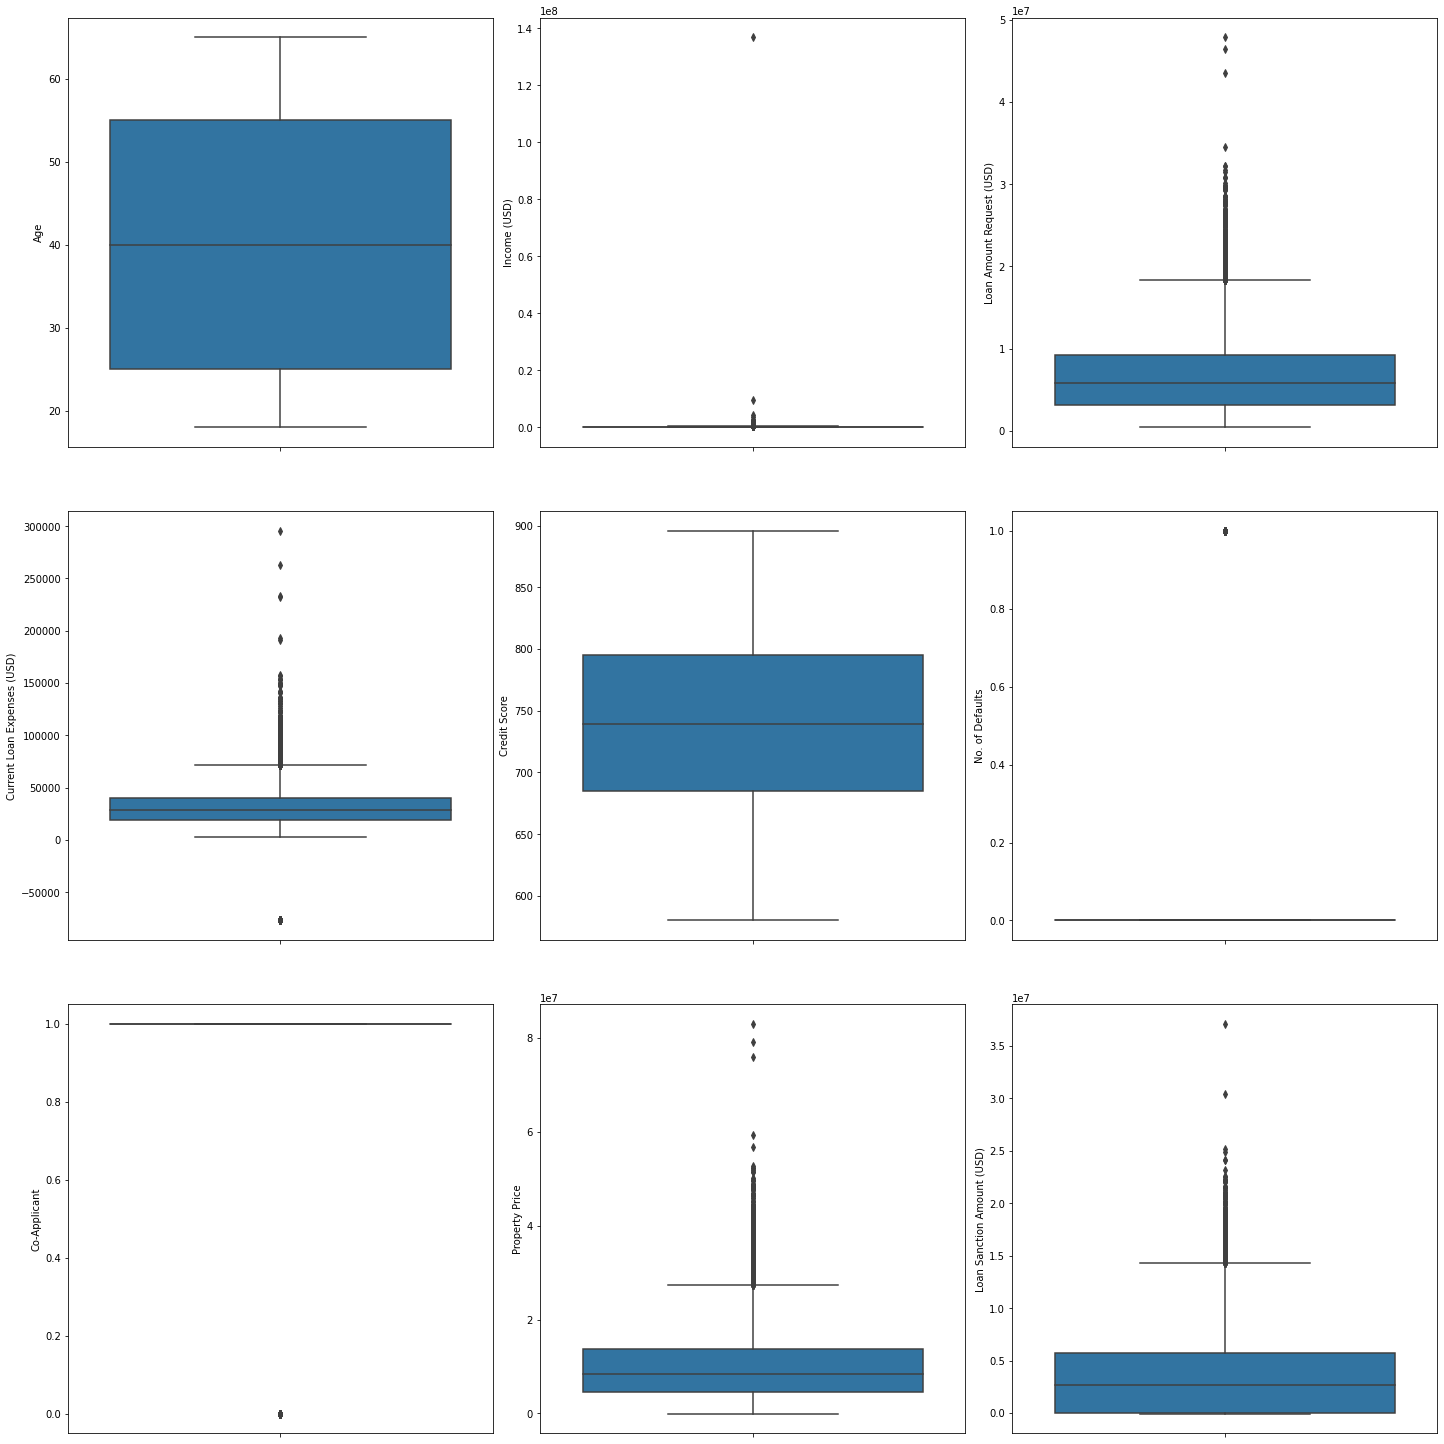

In [143]:
data1 = train.drop(columns=["Income Stability","Gender","Profession","Type of Employment","Location","Has Active Credit Card","Property Location"], axis=1)
#data1.head()

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

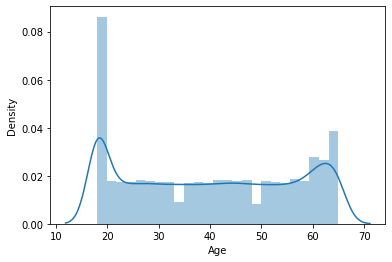

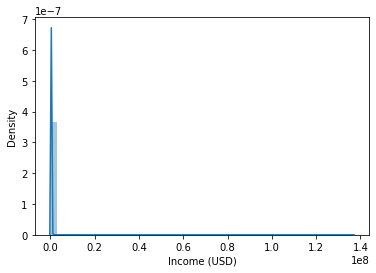

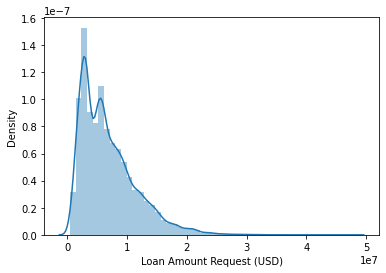

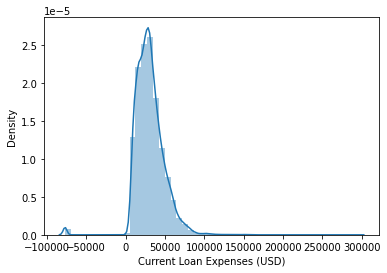

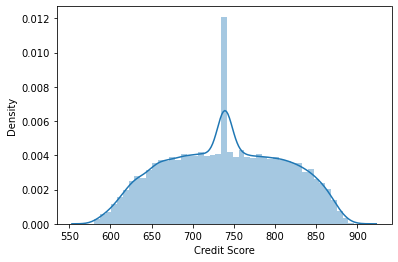

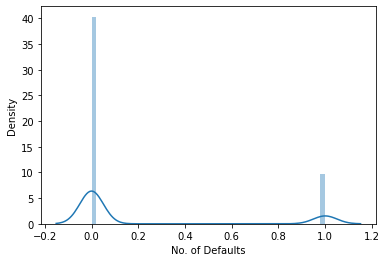

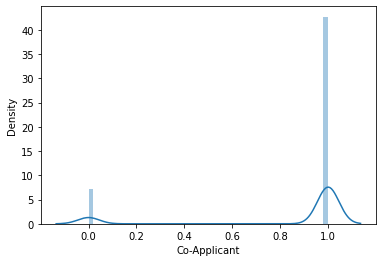

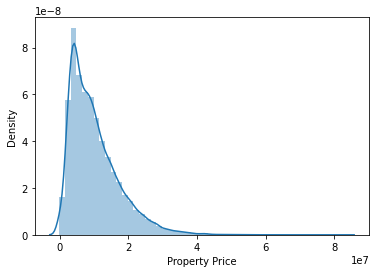

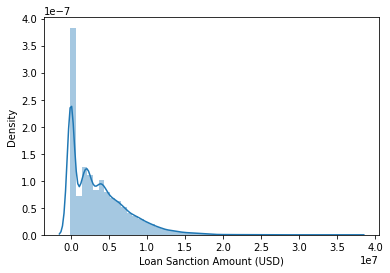

In [144]:
# Distplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "int32" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

In [145]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "int32" or train[train.columns[i]].dtypes == "float64":
        print(f'{train.columns[i]} : {train[train.columns[i]].skew()}')

Age : 0.04582561378441097
Income (USD) : 165.93253756285876
Loan Amount Request (USD) : 1.260863569864647
Current Loan Expenses (USD) : 0.06110999956361604
Credit Score : -0.020358488654904857
No. of Defaults : 1.5490919928715519
Co-Applicant : -2.0102276772262204
Property Price : 1.4191303085130944
Loan Sanction Amount (USD) : 1.2305370287069213


In [146]:
# CAPPING OUTLIERS

# percentile25 = train["colnames"].quantile(0.25)
# percentile75 = train["colnames"].quantile(0.75)
# iqr = percentile75 - percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr

def outlier_removal(column_name):
    upper_limit, lower_limit = column_name.quantile(0.75) + 1.5 * (column_name.quantile(0.75) - column_name.quantile(0.25)), column_name.quantile(0.75) - 1.5 * (column_name.quantile(0.75) - column_name.quantile(0.25))
    
    column_name = np.where(column_name > upper_limit,upper_limit,
                                              np.where(column_name < lower_limit,lower_limit,
                                              column_name))
    return column_name

In [147]:
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "int32" or train[train.columns[i]].dtypes == "float64":
        train[train.columns[i]] = outlier_removal(train[train.columns[i]])

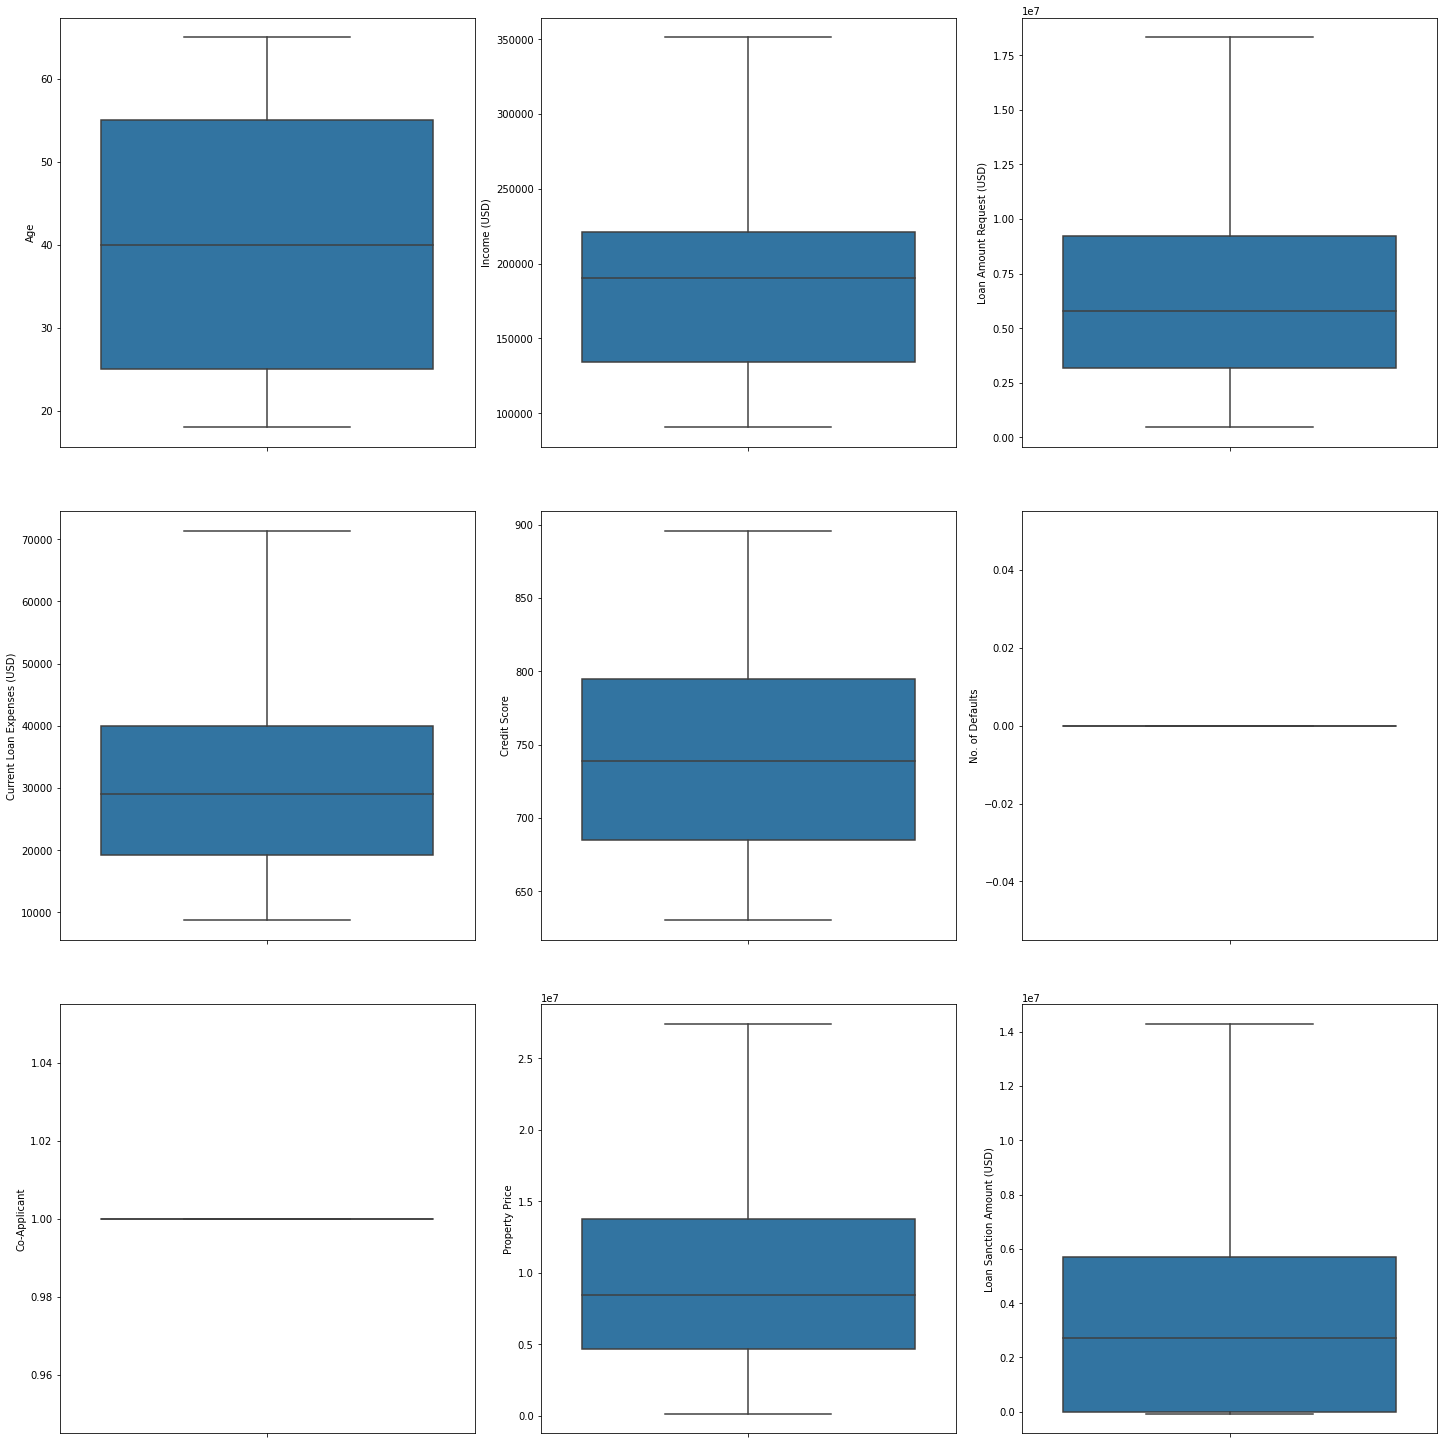

In [148]:
data1 = train.drop(columns=["Income Stability","Gender","Profession","Type of Employment","Location","Has Active Credit Card","Property Location"], axis=1)
#data1.head()

fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

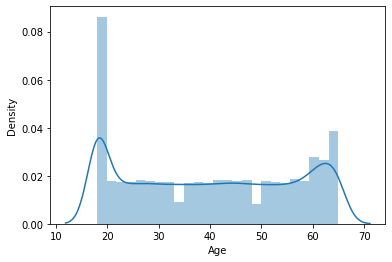

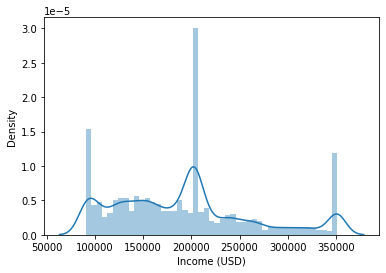

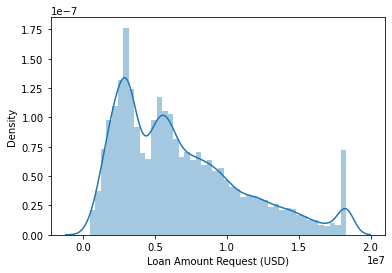

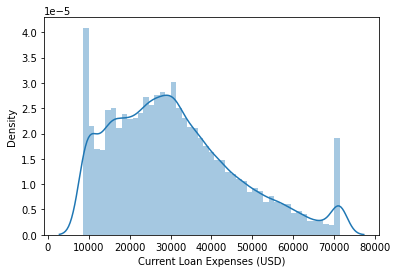

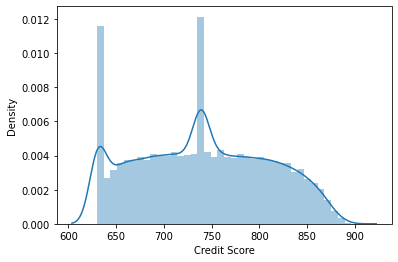

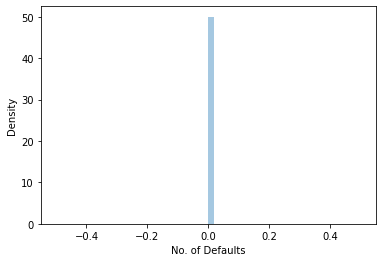

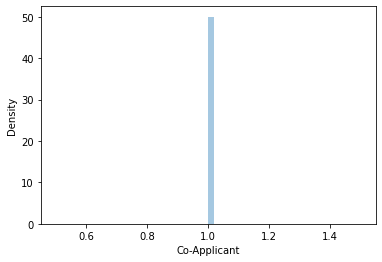

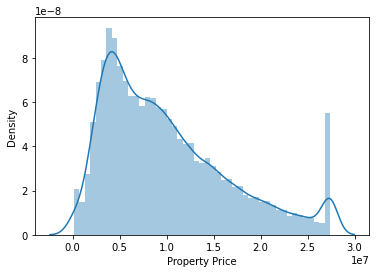

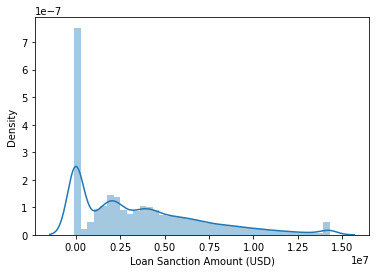

In [149]:
# Distplot
for i in range(len(list(train.columns))):
    if train[train.columns[i]].dtypes == "int64" or train[train.columns[i]].dtypes == "int32" or train[train.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(train[train.columns[i]]))
        #plt.xlabel(train.columns[i])

In [150]:
train.shape

(29494, 16)

In [151]:
train.to_csv("Cleaned_Loan_Details.csv")

Handling Categorical Features

Feature Scaling - Normalization

In [74]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,148844,Low,Working,Sales staff,Semi-Urban,5606337,18563,809,0,Active,Rural,1,9234876,4204752
1,M,32,381374,Low,Working,Laborers,Semi-Urban,3606485,38177,780,0,Unpossessed,Rural,1,4218907,2885188
2,F,65,76090,High,Pensioner,Laborers,Semi-Urban,3510664,13240,833,0,Unpossessed,Urban,0,5577924,2808531
3,F,65,202554,High,Pensioner,Laborers,Rural,6164459,22987,832,1,Unpossessed,Semi-Urban,1,9350996,4315121
4,F,31,201337,Low,Working,High skill tech staff,Semi-Urban,8767134,37838,745,1,Active,Semi-Urban,1,16059729,5698637


In [75]:
x = train.drop(columns=["Gender", "Current Loan Expenses (USD)", "Loan Sanction Amount (USD)"])
y = train["Loan Sanction Amount (USD)"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [76]:
x_train.head()

,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Credit Score,No. of Defaults,Has Active Credit Card,Property Location,Co-Applicant,Property Price
22612,46,202554,Low,Working,Laborers,Semi-Urban,12564657,778,0,Inactive,Urban,1,17716368
22137,20,139734,Low,Working,Managers,Semi-Urban,12144940,749,0,Active,Urban,1,19224024
24458,26,157109,Low,Working,Laborers,Semi-Urban,14025312,657,1,Active,Urban,1,22435345
27307,63,168346,High,Pensioner,Laborers,Semi-Urban,8923097,815,0,Unpossessed,Semi-Urban,1,12736588
18539,18,376833,Low,Commercial associate,Managers,Semi-Urban,8056468,838,0,Active,Semi-Urban,0,11475729


In [77]:
ohe = OneHotEncoder()
ohe.fit(train[["Income Stability", "Profession", "Type of Employment", "Location", "Has Active Credit Card", "Property Location"]])
ohe.categories_

[array(['High', 'Low'], dtype=object),
 array(['Businessman', 'Commercial associate', 'Pensioner',
        'State servant', 'Student', 'Unemployed', 'Working'], dtype=object),
 array(['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
        'Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
        'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
        'Private service staff', 'Realty agents', 'Sales staff',
        'Secretaries', 'Security staff', 'Waiters/barmen staff'],
       dtype=object),
 array(['Rural', 'Semi-Urban', 'Urban'], dtype=object),
 array(['Active', 'Inactive', 'Unpossessed'], dtype=object),
 array(['Rural', 'Semi-Urban', 'Urban'], dtype=object)]

In [78]:
transformer = make_column_transformer(
    ((OneHotEncoder(categories=ohe.categories_, drop="first", sparse=False), ["Income Stability", "Profession", "Type of Employment", "Location", "Has Active Credit Card", "Property Location"])),
    ((MinMaxScaler(), ["Age", "Income (USD)", "Loan Amount Request (USD)", "Credit Score", "No. of Defaults", "Co-Applicant", "Property Price"])),
    remainder="passthrough")

# Model Building

**LINEAR REGRESSION**

In [79]:
lr = LinearRegression()
pipe = make_pipeline(transformer, lr)
pipe.fit(x_train,y_train)
pred = pipe.predict(x_test)
r2_score(y_test, pred)*100

62.49068052159408

In [80]:
score = []
for i in range(200):

    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    lr = LinearRegression()
    pipe = make_pipeline(transformer, lr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    
    score.append(r2_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  135
67.0818631217529


In [81]:
lr = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))
    
pipe1 = make_pipeline(transformer, lr)

model1 = pipe1.fit(x_train,y_train)

pred1 = model1.predict(x_test)

r2_score(y_test, pred1)*100

67.0818631217529

In [82]:
# Training Data Accuracy

pred = model1.predict(x_train)
r2_score(y_train, pred)*100      #Underfit

63.634373603966665

**DECISION TREE REGRESSOR**

In [83]:
dtr = DecisionTreeRegressor(random_state=1)
pipe = make_pipeline(transformer,dtr)
pipe.fit(x_train,y_train)
pred = pipe.predict(x_test)
r2_score(y_test, pred)*100

55.66838479411253

In [84]:
score = []
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    dtr = DecisionTreeRegressor(random_state=1)
    pipe = make_pipeline(transformer,dtr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    
    score.append(r2_score(y_test,pred))
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  35
0.5830715396100112


In [85]:
dtr = DecisionTreeRegressor(random_state=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))

pipe2 = make_pipeline(transformer,dtr)

model2 = pipe2.fit(x_train,y_train)

pred2 = model2.predict(x_test)

r2_score(y_test, pred2)*100

58.30715396100112

In [86]:
# Training Data Accuracy

pred = model2.predict(x_train)
r2_score(y_train, pred)*100      #Overfit

100.0

In [87]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT
mod2 = cross_val_score(pipe2, x_train, y_train, cv=10)
print(mod2)
print(np.round(np.mean(mod2),2)*100)

[0.54715624 0.54103267 0.55754281 0.55515518 0.58346276 0.53351748
 0.52791048 0.53589971 0.49524855 0.59026329]
55.00000000000001


**RANDOM FOREST REGRESSOR**

In [88]:
parameters = {
    "n_estimators": [150,200,250,300],
    "min_samples_split": [6,7,8],
    "min_samples_leaf": [8,9,10]
}
gs = GridSearchCV(
    estimator = RandomForestRegressor(),
    param_grid = parameters,
    scoring = "r2",
    n_jobs = -1,
    cv = 5,
    verbose = 4
)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

d = gs.fit(x_train, y_train)
print(d.best_score_*100)
print(d.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
77.63433184858528
{'min_samples_leaf': 10, 'min_samples_split': 8, 'n_estimators': 250}


In [ ]:
# rfr = RandomForestRegressor(random_state=8, min_samples_leaf=10, min_samples_split=7, n_estimators=300)
# pipe = make_pipeline(transformer,rfr)
# pipe.fit(x_train,y_train)
# pred = pipe.predict(x_test)
# r2_score(y_test, pred)*100

In [96]:
score = []
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    rfr = RandomForestRegressor(random_state=i, min_samples_leaf=10, min_samples_split=8, n_estimators=250)
    pipe = make_pipeline(transformer,rfr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    
    score.append(r2_score(y_test,pred))
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  1
0.8005822785685892


In [108]:
rfr = RandomForestRegressor(random_state=np.argmax(score), min_samples_leaf=10, min_samples_split=8, n_estimators=250)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))

pipe3 = make_pipeline(transformer, rfr)

model3 = pipe3.fit(x_train,y_train)

pred3 = model3.predict(x_test)

r2_score(y_test, pred3)*100

80.05822785685892

In [98]:
# Training Data Accuracy

pred = model3.predict(x_train)
r2_score(y_train, pred)*100      #Generalized

83.89797690344544

In [99]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT
mod3 = cross_val_score(pipe3, x_train, y_train, cv=10)
print(mod3)
print(np.round(np.mean(mod3),2)*100)

[0.74293786 0.76476389 0.79422822 0.77994894 0.74450051 0.7290481
 0.7793197  0.75158807 0.77503055 0.78669733]
76.0


**KNN REGRESOR**

In [109]:
knnr = KNeighborsRegressor(n_neighbors=13)
pipe = make_pipeline(transformer, knnr)
pipe.fit(x_train,y_train)
pred = pipe.predict(x_test)
r2_score(y_test, pred)*100

38.09357222205841

In [110]:
score = []
for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    knnr = KNeighborsRegressor(n_neighbors=13)
    pipe = make_pipeline(transformer, knnr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    
    score.append(r2_score(y_test,pred))
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  1
0.38093572222058414


In [111]:
knnr = KNeighborsRegressor(n_neighbors=13)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))

pipe4 = make_pipeline(transformer, knnr)

model4 = pipe4.fit(x_train,y_train)

pred4 = model4.predict(x_test)

r2_score(y_test, pred4)*100

38.09357222205841

In [112]:
# Training Data Accuracy

pred = model4.predict(x_train)
r2_score(y_train, pred)*100      #underfit

45.43460684940691

In [113]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT
mod4 = cross_val_score(pipe4, x_train, y_train, cv=10)
print(mod4)
print(np.round(np.mean(mod4),2)*100)

[0.35050027 0.33396816 0.36647899 0.32023616 0.34244891 0.32594735
 0.33791601 0.36282071 0.34722854 0.35172238]
34.0


**ADABOOST REGRESSOR**

In [100]:
parameters = {
    "n_estimators": [100,150,200,250,300],
    "learning_rate": [0.00001,0.0001,0.001,0.01,0.1],
}
gs = GridSearchCV(
    estimator = AdaBoostRegressor(),
    param_grid = parameters,
    scoring = "r2",
    n_jobs = -1,
    cv = 5,
    verbose = 4
)

In [101]:
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

d = gs.fit(x_train, y_train)
print(d.best_score_*100)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
61.622632379820075


In [102]:
d.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [ ]:
# adbr = AdaBoostRegressor(random_state=0, n_estimators=200, learning_rate=0.01)
# pipe = make_pipeline(transformer, adbr)
# pipe.fit(x_train,y_train)
# pred = pipe.predict(x_test)
# r2_score(y_test, pred)*100

In [114]:
score = []
for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    adbr = AdaBoostRegressor(random_state = i, learning_rate = 0.01, n_estimators = 200)
    pipe = make_pipeline(transformer, adbr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    
    score.append(r2_score(y_test,pred))
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  1
0.6420061561083392


In [115]:
adbr = AdaBoostRegressor(random_state=np.argmax(score), learning_rate = 0.01, n_estimators = 200)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))

pipe5 = make_pipeline(transformer, adbr)

model5 = pipe5.fit(x_train,y_train)

pred5 = model5.predict(x_test)

r2_score(y_test, pred5)*100

64.20061561083392

In [116]:
# Training Data Accuracy

pred = model5.predict(x_train)
r2_score(y_train, pred)*100      #Underfit

61.904414682267664

In [117]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT
mod5 = cross_val_score(pipe5, x_train, y_train, cv=10)
print(mod5)
print(np.round(np.mean(mod5),2)*100)

[0.60105961 0.61531709 0.64774629 0.60005315 0.59409989 0.59286562
 0.6178319  0.61833506 0.61474981 0.6281027 ]
61.0


**GRADIENTBOOST REGRESSOR**

In [103]:
parameters = {
    "n_estimators": [150,200,250,300,350],
    "learning_rate": [0.00001,0.0001,0.001,0.01,0.1,1],
}
gs = GridSearchCV(
    estimator = AdaBoostRegressor(),
    param_grid = parameters,
    scoring = "r2",
    n_jobs = -1,
    cv = 5,
    verbose = 4
)

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

d = gs.fit(x_train, y_train)
print(d.best_score_*100)
print(d.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
62.43974031906051
{'learning_rate': 0.01, 'n_estimators': 150}


In [ ]:
# grbr = GradientBoostingRegressor(random_state=0, max_leaf_nodes=)
# pipe = make_pipeline(transformer, grbr)
# pipe.fit(x_train,y_train)
# pred = pipe.predict(x_test)
# r2_score(y_test, pred)*100

In [118]:
score = []
for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    grbr = GradientBoostingRegressor(random_state=i, learning_rate=0.01, n_estimators=150)
    pipe = make_pipeline(transformer, grbr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    
    score.append(r2_score(y_test,pred))
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  1
0.6767280939561073


In [119]:
grbr = GradientBoostingRegressor(random_state=np.argmax(score), learning_rate=0.01, n_estimators=150)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))

pipe6 = make_pipeline(transformer, grbr)

model6 = pipe6.fit(x_train,y_train)

pred6 = model6.predict(x_test)

r2_score(y_test, pred6)*100

67.67280939561073

In [120]:
# Training Data Accuracy

pred = model6.predict(x_train)
r2_score(y_train, pred)*100      #Underfit

65.40093295422747

In [121]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT
mod6 = cross_val_score(pipe6, x_train, y_train, cv=10)
print(mod6)
print(np.round(np.mean(mod6),2)*100)

[0.6420528  0.65355439 0.67276998 0.65551781 0.63897627 0.63671962
 0.65914364 0.6468033  0.63946624 0.65399595]
65.0


**XGB REGRESSOR**

In [105]:
parameters = {
    "n_estimators": [100,150,200,250,300],
    "learning_rate": [0.00001,0.01,0.1,0.2,],
}
gs = GridSearchCV(
    estimator = AdaBoostRegressor(),
    param_grid = parameters,
    scoring = "r2",
    n_jobs = -1,
    cv = 5,
    verbose = 4
)

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

d = gs.fit(x_train, y_train)
print(d.best_score_*100)
print(d.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
62.88168723989387
{'learning_rate': 0.01, 'n_estimators': 150}


In [ ]:
# xgbr = XGBRegressor()
# pipe = make_pipeline(transformer, xgbr)
# pipe.fit(x_train,y_train)
# pred = pipe.predict(x_test)
# r2_score(y_test, pred)*100

In [122]:
score = []
for i in range(100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    xgbr = XGBRegressor(learning_rate=0.01, n_estimators=150)
    pipe = make_pipeline(transformer, xgbr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    
    score.append(r2_score(y_test,pred))
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  1
0.7052240727507844


In [123]:
xgbr = XGBRegressor(learning_rate=0.01, n_estimators=150)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=309)

pipe7 = make_pipeline(transformer, xgbr)

model7 = pipe7.fit(x_train,y_train)

pred7 = model7.predict(x_test)

r2_score(y_test, pred7)*100

70.7783629755603

In [124]:
# Training Data Accuracy

pred = model7.predict(x_train)
r2_score(y_train, pred)*100      #Underfit

69.18893710302636

In [125]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT
mod7 = cross_val_score(pipe7, x_train, y_train, cv=10)
print(mod7)
print(np.round(np.mean(mod7),2)*100)

[0.69057135 0.68075097 0.6547477  0.67011574 0.68323028 0.68104985
 0.69390203 0.68156083 0.68115079 0.6767637 ]
68.0


**VOTING REGRESSOR**

In [126]:
estimators = [("xgbr",xgbr), ("rfr", rfr), ("grbr", grbr)]
vr = VotingRegressor(estimators=estimators)
pipe = make_pipeline(transformer, vr)
pipe.fit(x_train,y_train)
pred = pipe.predict(x_test)
r2_score(y_test, pred)*100

76.19920276264493

In [128]:
score = []
for i in range(20):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    estimators = [("xgbr",xgbr), ("rfr", rfr), ("grbr", grbr)]
    vr = VotingRegressor(estimators=estimators)
    pipe = make_pipeline(transformer, vr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    r2_score(y_test, pred)*100
    
    score.append(r2_score(y_test,pred))
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  1
0.7617902401243111


In [129]:
estimators = [("xgbr",xgbr), ("rfr", rfr), ("grbr", grbr)]
vr = VotingRegressor(estimators=estimators)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))

pipe8 = make_pipeline(transformer, vr)

model8 = pipe8.fit(x_train,y_train)

pred8 = model8.predict(x_test)

r2_score(y_test, pred8)*100

76.17902401243111

In [130]:
# Training Data Accuracy

pred = model8.predict(x_train)
r2_score(y_train, pred)*100      #Underfit

76.32794710764924

In [131]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT
mod8 = cross_val_score(pipe8, x_train, y_train, cv=5)
print(mod8)
print(np.round(np.mean(mod8),2)*100)

[0.7266256  0.74612112 0.71542724 0.7320156  0.72788163]
73.0


**STACKING REGRESSOR**

In [133]:
estimators = [("xgbr",xgbr), ("rfr", rfr), ("grbr", grbr)]
sr = StackingRegressor(cv=5, estimators=estimators, final_estimator=rfr)
pipe = make_pipeline(transformer, sr)
pipe.fit(x_train,y_train)
pred = pipe.predict(x_test)
r2_score(y_test, pred)*100

76.36596632280927

In [136]:
score = []
for i in range(5):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    estimators = [("xgbr",xgbr), ("rfr", rfr), ("grbr", grbr)]
    sr = StackingRegressor(cv=5, estimators=estimators, final_estimator=rfr)
    pipe = make_pipeline(transformer, sr)
    pipe.fit(x_train,y_train)
    pred = pipe.predict(x_test)
    r2_score(y_test, pred)*100
    
    score.append(r2_score(y_test,pred))
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  1
0.7937853255181284


In [137]:
estimators = [("xgbr",xgbr), ("rfr", rfr), ("grbr", grbr)]
sr = StackingRegressor(cv=5, estimators=estimators, final_estimator=rfr)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=np.argmax(score))

pipe9 = make_pipeline(transformer, sr)

model9 = pipe9.fit(x_train,y_train)

pred9 = model9.predict(x_test)

r2_score(y_test, pred9)*100

79.37853255181284

In [138]:
# Training Data Accuracy

pred = model9.predict(x_train)
r2_score(y_train, pred)*100      #Generalized

78.37001615619262

In [139]:
#CROSS VALIDATION TO CHECK WHETHER THE MODEL IS GENERALIZED OR NOT
mod9 = cross_val_score(pipe9, x_train, y_train, cv=5)
print(mod9)
print(np.round(np.mean(mod9),2)*100)

[0.74484207 0.78392296 0.7281508  0.76130177 0.76407105]
76.0


In [141]:
pickle.dump(model3, open("Loan_Sanction_Amount_model.pkl","wb"))